In [273]:
#downloading dataset, importing libraries
import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns

import sys

from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier





from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.decomposition import PCA

In [274]:
#reading the dataset, deleting missing value entries
df = pd.read_csv('data-breast cancer.csv')



df.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [275]:
#dropping columns with very low correlation and null values
df.drop(df.columns[[0,4,7,8,9,10,11,13,32]], axis =1, inplace = True)
df.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'area_mean',
       'smoothness_mean', 'radius_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [276]:
#encoding diagnosis column as it contains string values M for Malignant and B for Benign
enc = OrdinalEncoder()


df[['diagnosis']] = enc.fit_transform(df[['diagnosis']])

<Axes: >

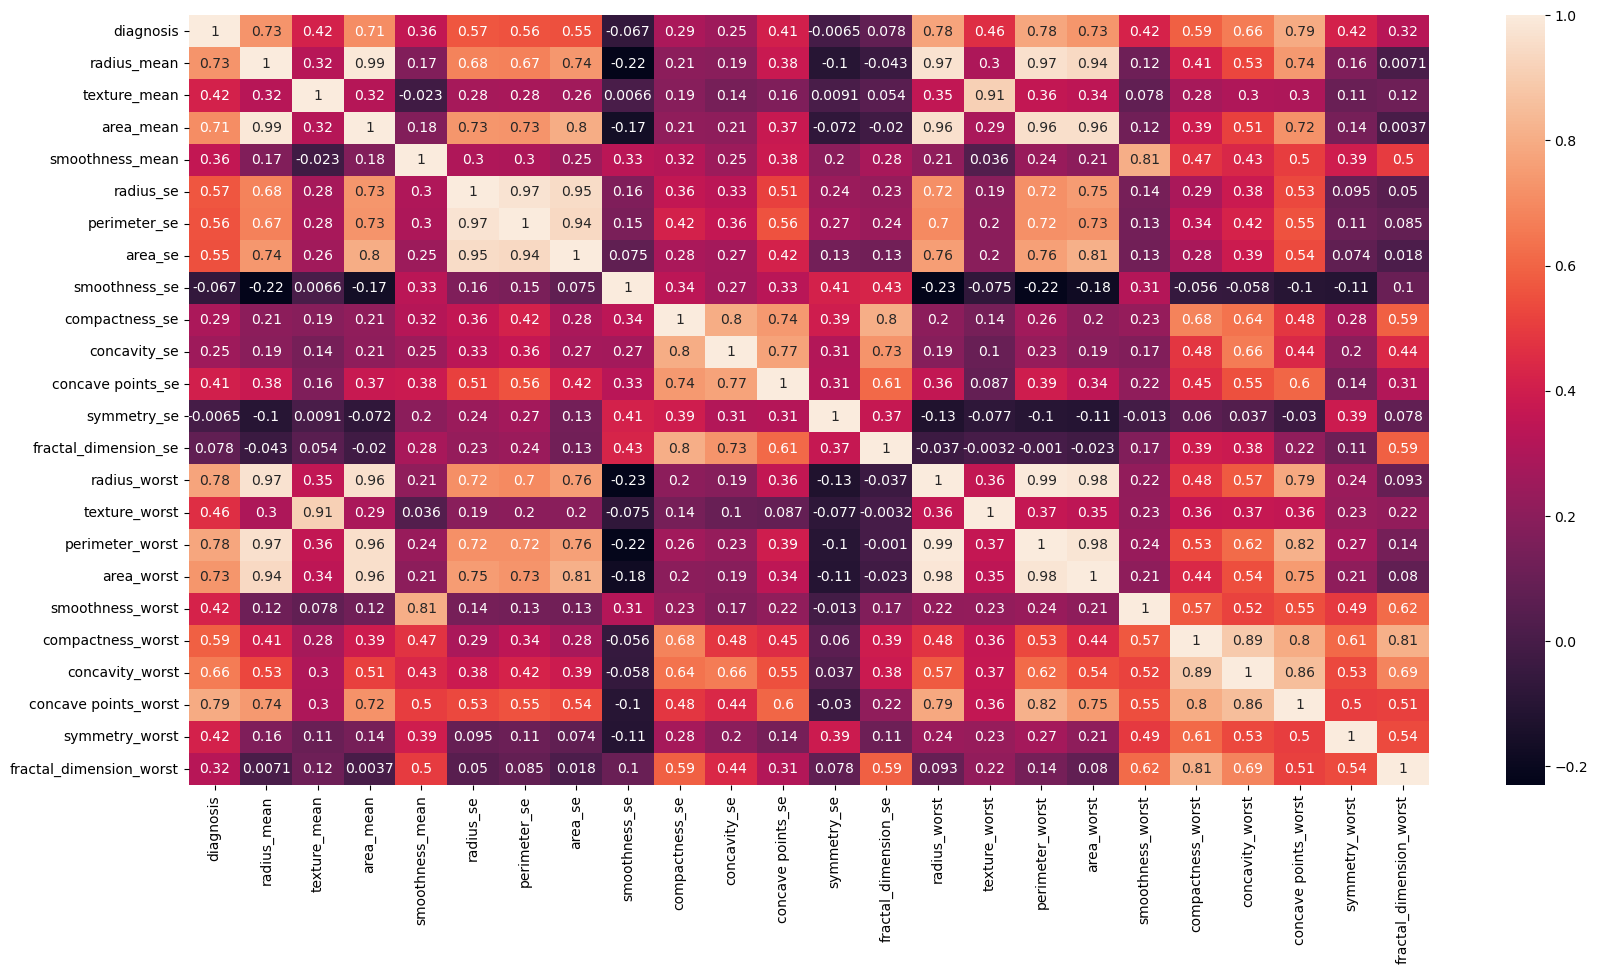

In [277]:
#visualization: correlation heatmap
plt.figure(figsize =(20,10))
sns.heatmap(df.corr(), annot = True)

In [278]:
#selecting features based on high correlation

# radius mean, area_mean, radius_worst, perimeter_worst, area_worst, concavity worst, concavepoints_worst
selected_features = df[['radius_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst' ]]
display(selected_features)

,radius_mean,area_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,17.99,1001.0,25.380,184.60,2019.0,0.7119,0.2654
1,20.57,1326.0,24.990,158.80,1956.0,0.2416,0.1860
2,19.69,1203.0,23.570,152.50,1709.0,0.4504,0.2430
3,11.42,386.1,14.910,98.87,567.7,0.6869,0.2575
4,20.29,1297.0,22.540,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...
564,21.56,1479.0,25.450,166.10,2027.0,0.4107,0.2216
565,20.13,1261.0,23.690,155.00,1731.0,0.3215,0.1628
566,16.60,858.1,18.980,126.70,1124.0,0.3403,0.1418
567,20.60,1265.0,25.740,184.60,1821.0,0.9387,0.2650


In [279]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X = scaler.fit_transform(selected_features)

<Axes: ylabel='count'>

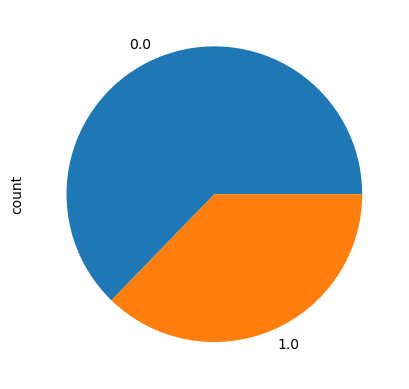

In [280]:
df['diagnosis'].value_counts().plot(kind = 'pie')
#Blue is Benign, #M is malignant

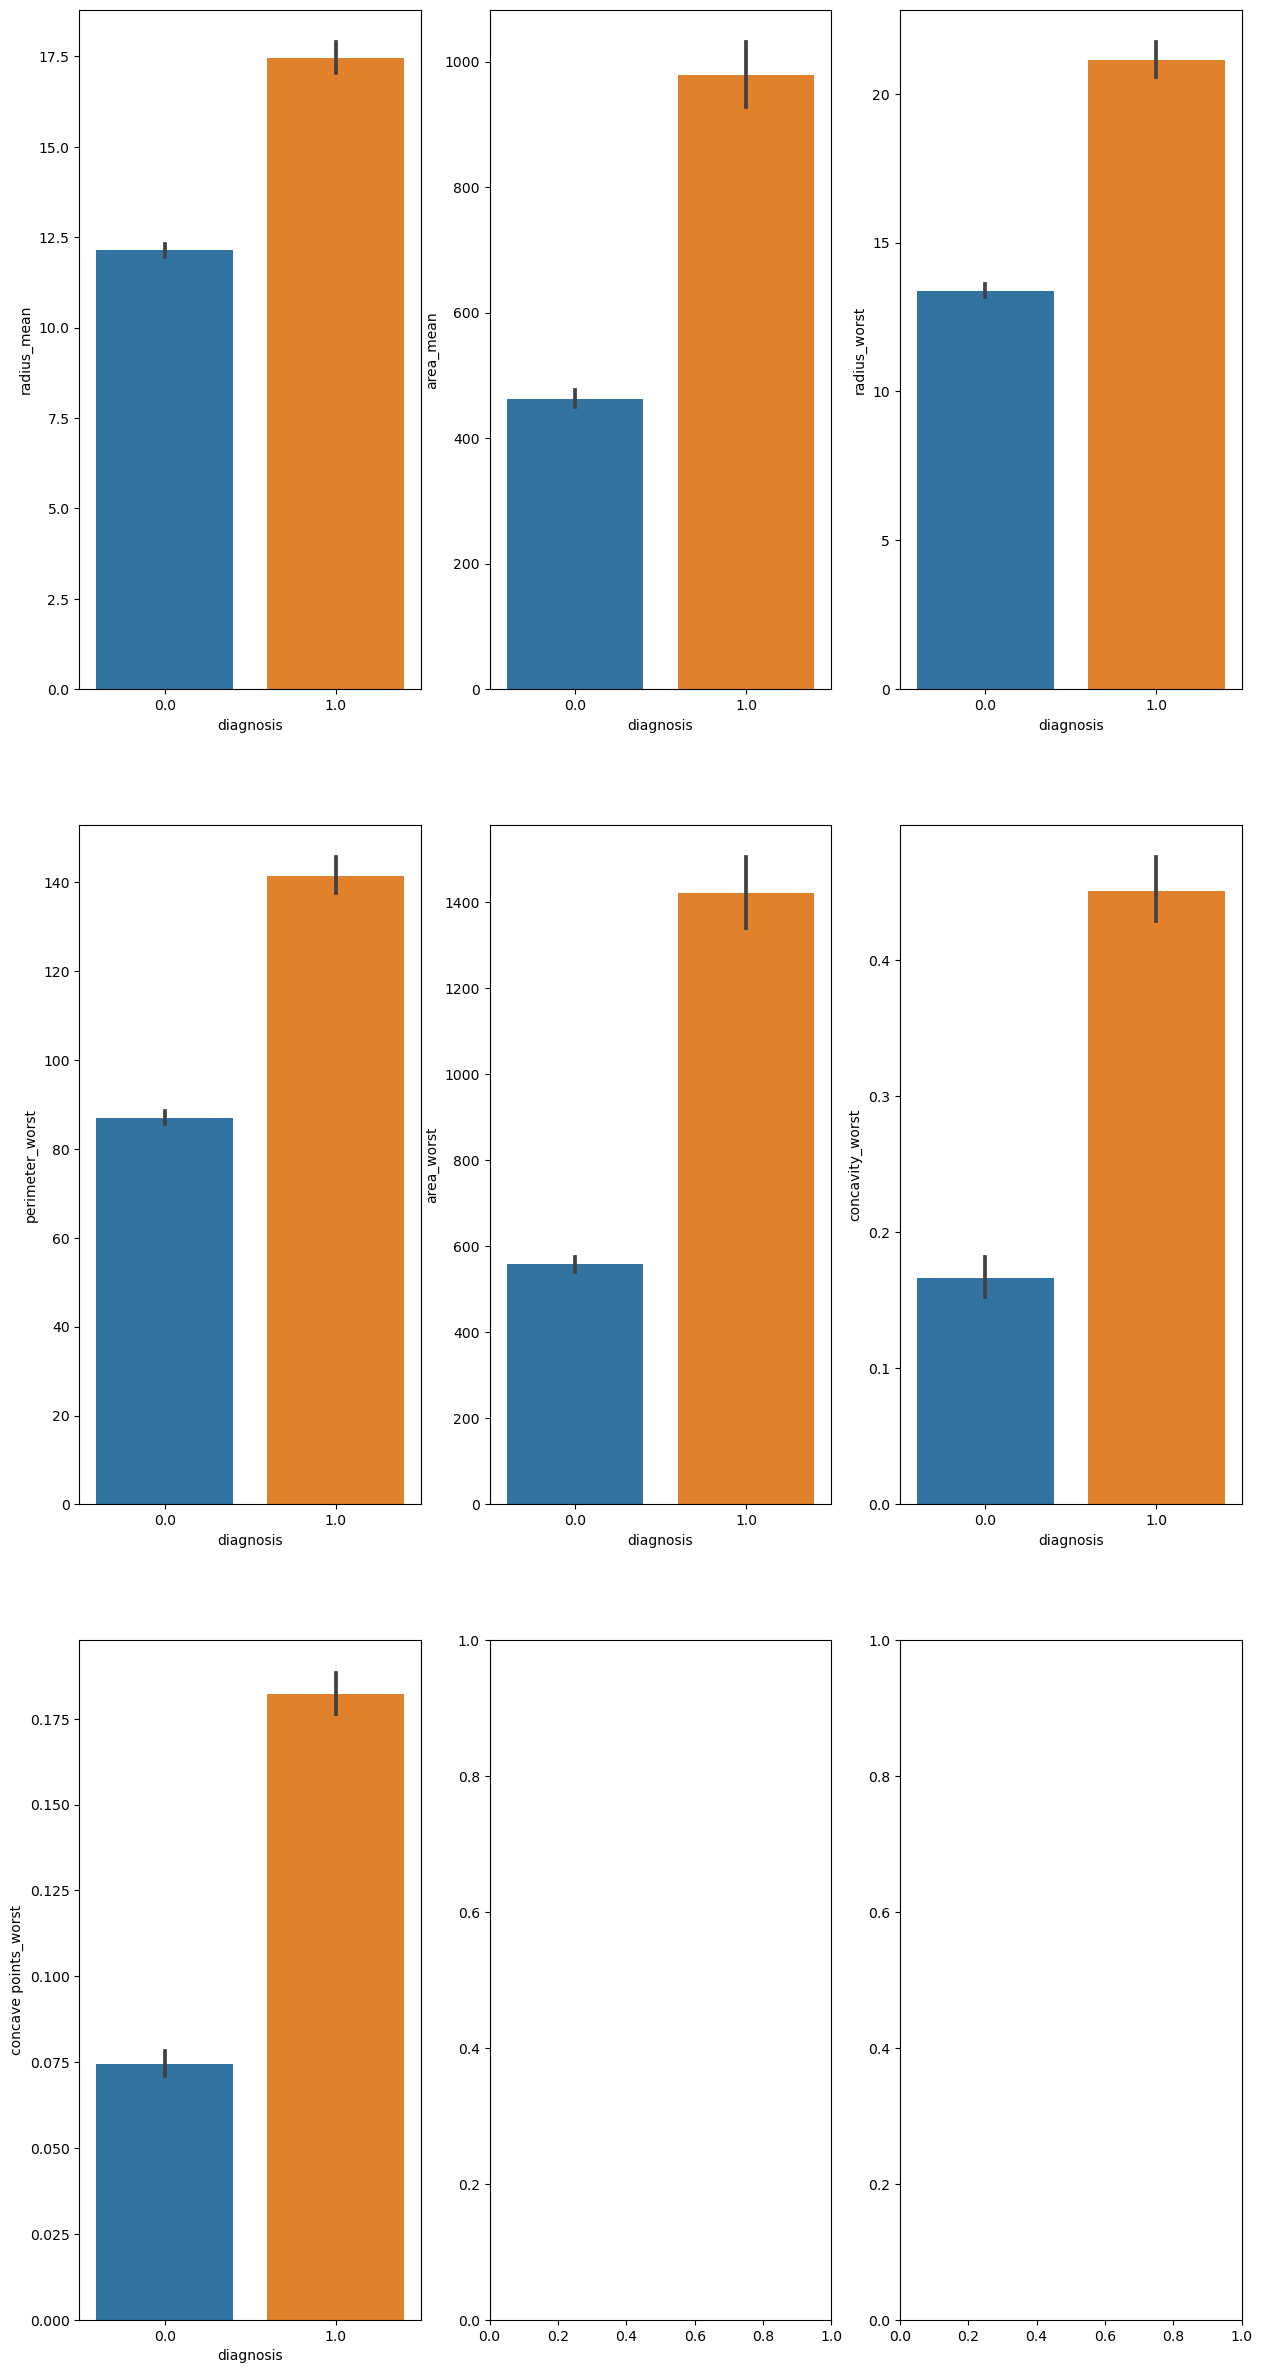

In [281]:
#barplots to show individual correlation of selected features with diagnosis (Malignant and Benign)
fig, ax = plt.subplots(figsize = (15,30),nrows = 3, ncols = 3)
ax = ax.flatten()
for i, col in enumerate(selected_features):
    sns.barplot(x = 'diagnosis', y = col, data = df, ax = ax[i]);

In [282]:
selected_features

,radius_mean,area_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,17.99,1001.0,25.380,184.60,2019.0,0.7119,0.2654
1,20.57,1326.0,24.990,158.80,1956.0,0.2416,0.1860
2,19.69,1203.0,23.570,152.50,1709.0,0.4504,0.2430
3,11.42,386.1,14.910,98.87,567.7,0.6869,0.2575
4,20.29,1297.0,22.540,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...
564,21.56,1479.0,25.450,166.10,2027.0,0.4107,0.2216
565,20.13,1261.0,23.690,155.00,1731.0,0.3215,0.1628
566,16.60,858.1,18.980,126.70,1124.0,0.3403,0.1418
567,20.60,1265.0,25.740,184.60,1821.0,0.9387,0.2650


In [283]:
# defining y variable

y = df['diagnosis'].values

In [284]:
#creating a split (train/test)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=45)


#creating a split (train/val)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=45)

# now the train/validate/test split will be 80%/10%/10%

In [285]:
#training random forest model for testing
scores = []
    
for k in range(1,20):
    model = RandomForestClassifier(random_state = 0, criterion = "entropy" , n_estimators = k)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

In [286]:
scores

[0.9122807017543859,
 0.8947368421052632,
 0.9298245614035088,
 0.8947368421052632,
 0.9298245614035088,
 0.9298245614035088,
 0.9473684210526315,
 0.9473684210526315,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9122807017543859,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088]

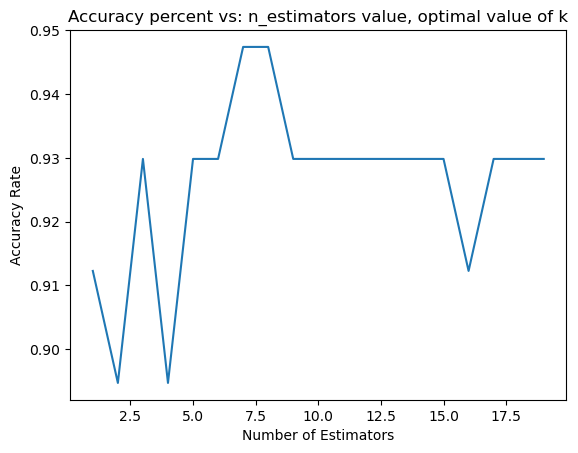

In [301]:
#plotting accuracy percentage vs n_estimators (testing)(Random Forest Model)


plt.plot(range(1,20), scores)
plt.title("Accuracy percent vs: n_estimators value, optimal value of k")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Rate")

plt.show()

In [288]:
#training KNeighborsClassifier for testing
acc_score = []

for k in range (1,30):
    knn = KNeighborsClassifier(n_neighbors = k)                              
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_test_pred))
    
   
    


In [289]:
acc_score

[0.9298245614035088,
 0.9122807017543859,
 0.9122807017543859,
 0.8947368421052632,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9473684210526315,
 0.9298245614035088,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.8947368421052632,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859]

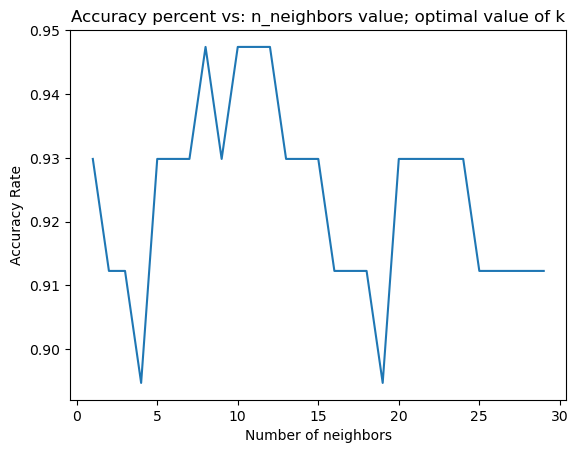

In [290]:
#plotting accuracy percentage vs n_neighbors (testing)(KNeighborsClassifier)


plt.plot(range(1,30), acc_score)
plt.title("Accuracy percent vs: n_neighbors value; optimal value of k")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy Rate")

plt.show()

confusion matrix:
 [[35  2]
 [ 2 18]]


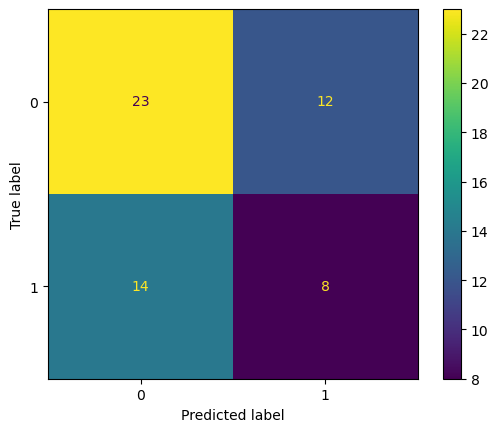

In [291]:

#training SVC (support vector classifier) for testing
scoreSVC = []

svm = SVC(kernel = 'rbf', gamma = 'auto', C = 0.2, random_state = 0).fit(X_train, y_train)
y_pred = svm.predict(X_test)
    
scoreSVC = svm.score(X_test,y_test)
con = confusion_matrix(y_test, y_pred)
print ("confusion matrix:\n",con)
cmval = confusion_matrix(y_val, y_pred)
cmval_display = ConfusionMatrixDisplay(cmval).plot()
    

In [292]:
   
scoreSVC

0.9298245614035088

In [293]:
#conclusion
print ("Based on the above 3 models, KNeighbors classifier gives higher accuracy scores closer to 94% followed by Random Forest model")

Based on the above 3 models, KNeighbors classifier gives higher accuracy scores closer to 94% followed by Random Forest model


In [294]:
#Principal Component Analysis (PCA) for dimensionality reduction
#step 1: dropping diagnosis column to prevent double counting 
df = df.drop(columns = ['diagnosis'])


In [295]:
#Principal Component Analysis (PCA) for dimensionality reduction
#step 2: scaling 
scaled = StandardScaler()
scaled.fit(df)

StandardScaler()

In [296]:
#Principal Component Analysis (PCA) for dimensionality reduction
#step 3: transforming 
scaled_data = scaled.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  0.9843749 , ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.90870825, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.55888363, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.57795264, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.73521799, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.34778924, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [297]:
#decomposition of data into 2 components.
#reason 2 components because breast cancer is either "malignant" or "benign"

pca = PCA(n_components  = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [298]:
#getting shape of new data (i.e. rows and columns)
scaled_data.shape
x_pca.shape

(569, 2)

In [299]:
#displaying array
x_pca

array([[ 7.30774726,  1.1967945 ],
       [ 2.51948695, -3.08287142],
       [ 4.85836633, -0.51459984],
       ...,
       [ 1.54592407, -1.21051267],
       [ 8.37839507,  1.62381173],
       [-4.60773044, -1.13261157]])

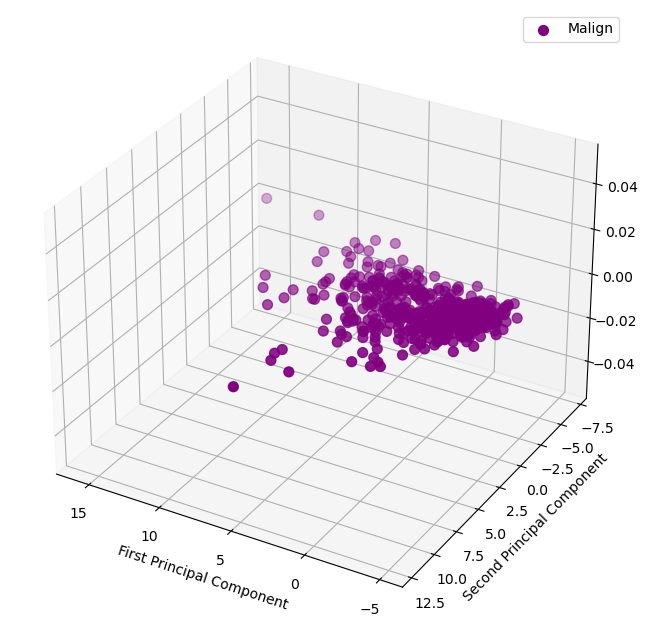

In [300]:
#scatter plot for dimensionality reduction to 2 components
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_pca[:,0],x_pca[:,1], c = "purple", s = 50)
ax.legend(['Malign'])

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.view_init(30,120)